### writes 'coords'  for open boundary case

    for i in npt: 
        write x(i), y(i), z(i)   
    loop over cells (j,k):  
         write node numbers surrounding cell,  counterclockwise from lower left

In [111]:
%matplotlib inline

In [112]:
import matplotlib.pylab as plt
import numpy as np

In [113]:
ncol = 94
nrow = 63
dt = .02

In [134]:
def write_coords(fname = 'coords', ncol = ncol, nrow = nrow, dx = 2, slope = 0.4):        
    npt = (ncol+1)*(nrow+1)  # number of points
    ne = nrow*ncol  # number of edges
    nbcell = 2*ncol + 2*nrow - 4  # number of boundary cells

    xdum = np.arange(1, (ncol*dx+2), dx )
    ydum = np.arange(1, (nrow*dx+2), dx )
    ydum, xdum = np.meshgrid(ydum, xdum)

    zmax = slope/100.*(np.max(ydum) - np.min(ydum))
    zdum = np.linspace(0, zmax, nrow+1)
    zdum = np.tile(zdum, [ncol+1]).reshape([ncol+1, nrow+1])

    x = np.zeros(npt + 1)
    y = np.zeros(npt + 1)
    z = np.zeros(npt + 1)
    x[1:] = xdum.ravel()
    y[1:] = ydum.ravel()
    z[1:] = zdum.ravel()

    # print (np.max(zdum) - np.min(zdum))/(np.max(ydum) - np.min(ydum))*100
    # (ncol+1) by (nrow+1)  -  node numbers
    nodes = np.arange(1, npt+1, dtype = int).reshape([ncol+1, nrow+1])

    nop = np.zeros([ncol+1, nrow+1, 4], dtype = int)
    for j in range(ncol):
        for k in range(nrow):
            nop[j+1, k+1] =  nodes[j,k], nodes[j+1, k], nodes[j+1,k+1], nodes[j,k+1]
            
    # dry_py.f needs an input file.  this file creates it.
    f = open(fname, 'w')
    f.write('{0:<13}   {1:<13}\n'.format(npt, ne))

    # write x, y, z
    for n in range(1, npt+1):
        f.write('{0:<13.6f} {1:<13.6f} {2:<13.6f}\n'.format(x[n],y[n],z[n])) 

    # write node numbers  
    for j in range(1, ncol+1):
        for k in range(1, nrow+1):
            n1 = nop[j, k, 0] 
            n2 = nop[j, k, 1]       
            n3 = nop[j, k, 2]        
            n4 = nop[j, k, 3] 
            f.write('{0:<10} {1:<10}  {2:<10} {3:<10}\n'.format(n1, n2, n3, n4)) 
    f.close()  
    
    
    # get cell center values:
    xcc  = np.zeros([ncol+2, nrow+2])    
    ycc  = np.zeros([ncol+2, nrow+2])
    zcc  = np.zeros([ncol+2, nrow+2])

    for j in range(ncol+1):
        for k in range( nrow+1):
            n1 = nop[j, k, 0] 
            n2 = nop[j, k, 1]       
            n3 = nop[j, k, 2]        
            n4 = nop[j, k, 3]  
            xcc[j,k] = 0.25*(x[n1] + x[n2] + x[n3] + x[n4])  
            ycc[j,k] = 0.25*(y[n1] + y[n2] + y[n3] + y[n4])
            zcc[j,k] = 0.25*(z[n1] + z[n2] + z[n3] + z[n4])   
            
    plt.imshow(zcc[1:-1, 1:-1].T, cmap = "Blues", origin = "lower", aspect = 'auto')
    plt.colorbar()
    return  nop, x, y, z




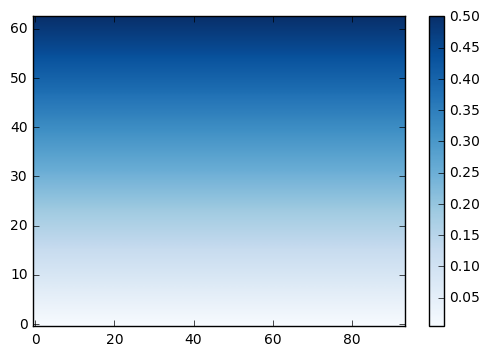

In [135]:
nop, x, y, z = write_coords(fname='coords_test')

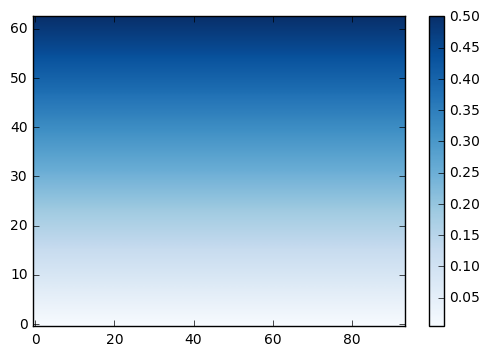

In [137]:
# get cell center values:
xcc  = np.zeros([ncol+2, nrow+2])    
ycc  = np.zeros([ncol+2, nrow+2])
zcc  = np.zeros([ncol+2, nrow+2])

for j in range(ncol+1):
    for k in range( nrow+1):
        n1 = nop[j, k, 0] 
        n2 = nop[j, k, 1]       
        n3 = nop[j, k, 2]        
        n4 = nop[j, k, 3]  
        xcc[j,k] = 0.25*(x[n1] + x[n2] + x[n3] + x[n4])  
        ycc[j,k] = 0.25*(y[n1] + y[n2] + y[n3] + y[n4])
        zcc[j,k] = 0.25*(z[n1] + z[n2] + z[n3] + z[n4])   

plt.imshow(zcc[1:-1, 1:-1].T, cmap = "Blues", origin = "lower", aspect = 'auto')
plt.colorbar()

In [116]:
def  write_dryin(fname = 'dryin.dat', ncol = ncol, nrow = nrow, dt = dt):
    inum = np.zeros([ncol+1, nrow+1], dtype = int)
    inum[1:, 1] = 1
    inum[1:, -1]= 1
    inum[1, 1:] = 1
    inum[-1, 1:] = 1
    inum[1, 1] = 2
    inum[1, -1] = 2
    inum[-1, -1] = 2
    inum[-1, 1] = 2
    
    ipos = np.zeros( [ncol+1, nrow+1, 2], dtype = int)
    # bottom boundary
    ipos[2:-1, 1,0] = 1
    ipos[1, 1,1] = 1
    ipos[-1, 1,1] = 1

    # right boundary
    ipos[-1, 1:-1, 0] = 2
    ipos[-1, -1,1] = 2

    # left boundary
    ipos[1, 1:, 0] = 4

    # top boundary
    ipos[2:, -1,0] = 3
    ipos[1, -1,1] = 3
    
    itype = np.zeros([ncol+1, nrow+1, 2], dtype = int)
    # bottom boundary
    itype[2:-1, 1,0] = 0
    itype[1, 1,1] = 0
    itype[-1, 1,1] = 0

    # right boundary
    itype[-1, 1:-1, 0] = 1
    itype[-1, -1,1] = 1

    # left boundary
    itype[1, 1:,0] = 1

    # top boundary
    itype[2:, -1,0] = 1
    itype[1, -1,1] = 1
    
    npt = (ncol+1)*(nrow+1)  # number of points
    ne = nrow*ncol  # number of edges
    nbcell = 2*ncol + 2*nrow - 4  # number of boundary cells

    f = open(fname, 'w')
    f.write('gravity     dt        tmax      xsplit      Manning n    \n')
    f.write('9.806d0    0.02       2000.     100.d0       0.05d0      \n')
    f.write(' epsh       beta   prate \n')  
    f.write('0.0025d0    2.d0   0.07d0 \n')
    f.write('xk          ainflt       binflt           tc           cappa \n')
    f.write('3.9217d-4    0.5d0       2.65d-7         0.d0        0.99d0 \n')
    f.write('istart     imass      ifront         print interval  \n')
    f.write(' 0         1          1               100 \n')
    f.write('number of boundary cell \n') 
    f.write('  {0} \n'.format(nbcell))
    f.write(' j    k          inum    itype             ipos \n')
    # f.write(' j \t k \tinum    itype \t\t ipos')
    j = 1
    for k in range(1, nrow+1):
        if inum[j, k] == 2:
            f.write( '{0:<5} {1:<13} {2:<7} {3:<8} {4:<9} {5:<8} {6:<6} \n'.format(
                        j, k, inum[j, k], itype[j, k, 0], itype[j, k, 1], 
                         ipos[j, k, 0], ipos[j, k, 1]))
        else:
            f.write( '{0:<5} {1:<13} {2:<7} {3:<18} {4:<10}   \n'.format(
                         j, k, inum[j, k],  itype[j, k, 0],  ipos[j, k, 0], ))

    for j in range(2, ncol+1):
        if inum[j, k] == 2:
            f.write( '{0:<5} {1:<13} {2:<7} {3:<8} {4:<9} {5:<8} {6:<6} \n'.format(
                        j, k, inum[j, k], itype[j, k, 0], itype[j, k, 1], 
                         ipos[j, k, 0], ipos[j, k, 1]))
        else:
            f.write( '{0:<5} {1:<13} {2:<7} {3:<18} {4:<10}   \n'.format(
                         j, k, inum[j, k],  itype[j, k, 0],  ipos[j, k, 0], ))

    for k in range(nrow-1,0,-1):
        if inum[j, k] == 2:
            f.write( '{0:<5} {1:<13} {2:<7} {3:<8} {4:<9} {5:<8} {6:<6} \n'.format(
                        j, k, inum[j, k], itype[j, k, 0], itype[j, k, 1], 
                         ipos[j, k, 0], ipos[j, k, 1]))
        else:
            f.write( '{0:<5} {1:<13} {2:<7} {3:<18} {4:<10}   \n'.format(
                         j, k, inum[j, k],  itype[j, k, 0],  ipos[j, k, 0], ))
            
    for j in range(ncol-1,1,-1):
        if inum[j, k] == 2:
            f.write( '{0:<5} {1:<13} {2:<7} {3:<8} {4:<9} {5:<8} {6:<6} \n'.format(
                        j, k, inum[j, k], itype[j, k, 0], itype[j, k, 1], 
                         ipos[j, k, 0], ipos[j, k, 1]))
        else:
            f.write( '{0:<5} {1:<13} {2:<7} {3:<18} {4:<10}   \n'.format(
                         j, k, inum[j, k],  itype[j, k, 0],  ipos[j, k, 0], ))

    kbeg = np.ones(ncol+1, dtype = int)
    kend = np.ones(ncol+1, dtype = int)*nrow

   
    f.write('ncol\n')
    f.write("{0}\n".format(ncol))
    f.write('j     kbeg          kend \n')
    for j in range(1, ncol+1):
        f.write( '{0:>5}  {1:>5} {2:>13}   \n'.format(
                    j, kbeg[j],kend[k] ))

    f.write('h0l      u0l    v0l   \n ')
    f.write('0.d0     0.0    0.0  \n ')
    f.write('h0r      u0r    v0r  \n ')
    f.write('0.d0     0.0    0.0  \n ')
    f.close()
    return inum, ipos, itype

In [117]:
inum, ipos, itype = write_dryin(fname = 'dryintest.dat')

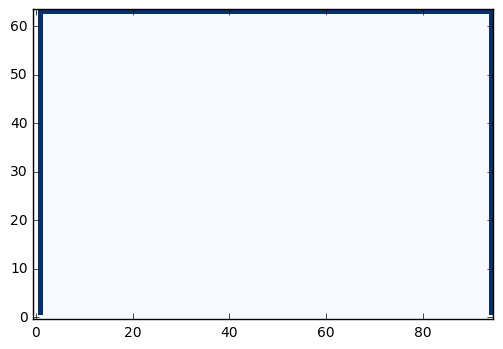

In [118]:
# Bottom boundary is open
plt.imshow(itype[:, :, 0].T, cmap = 'Blues', 
           origin = 'lower', interpolation = 'none')